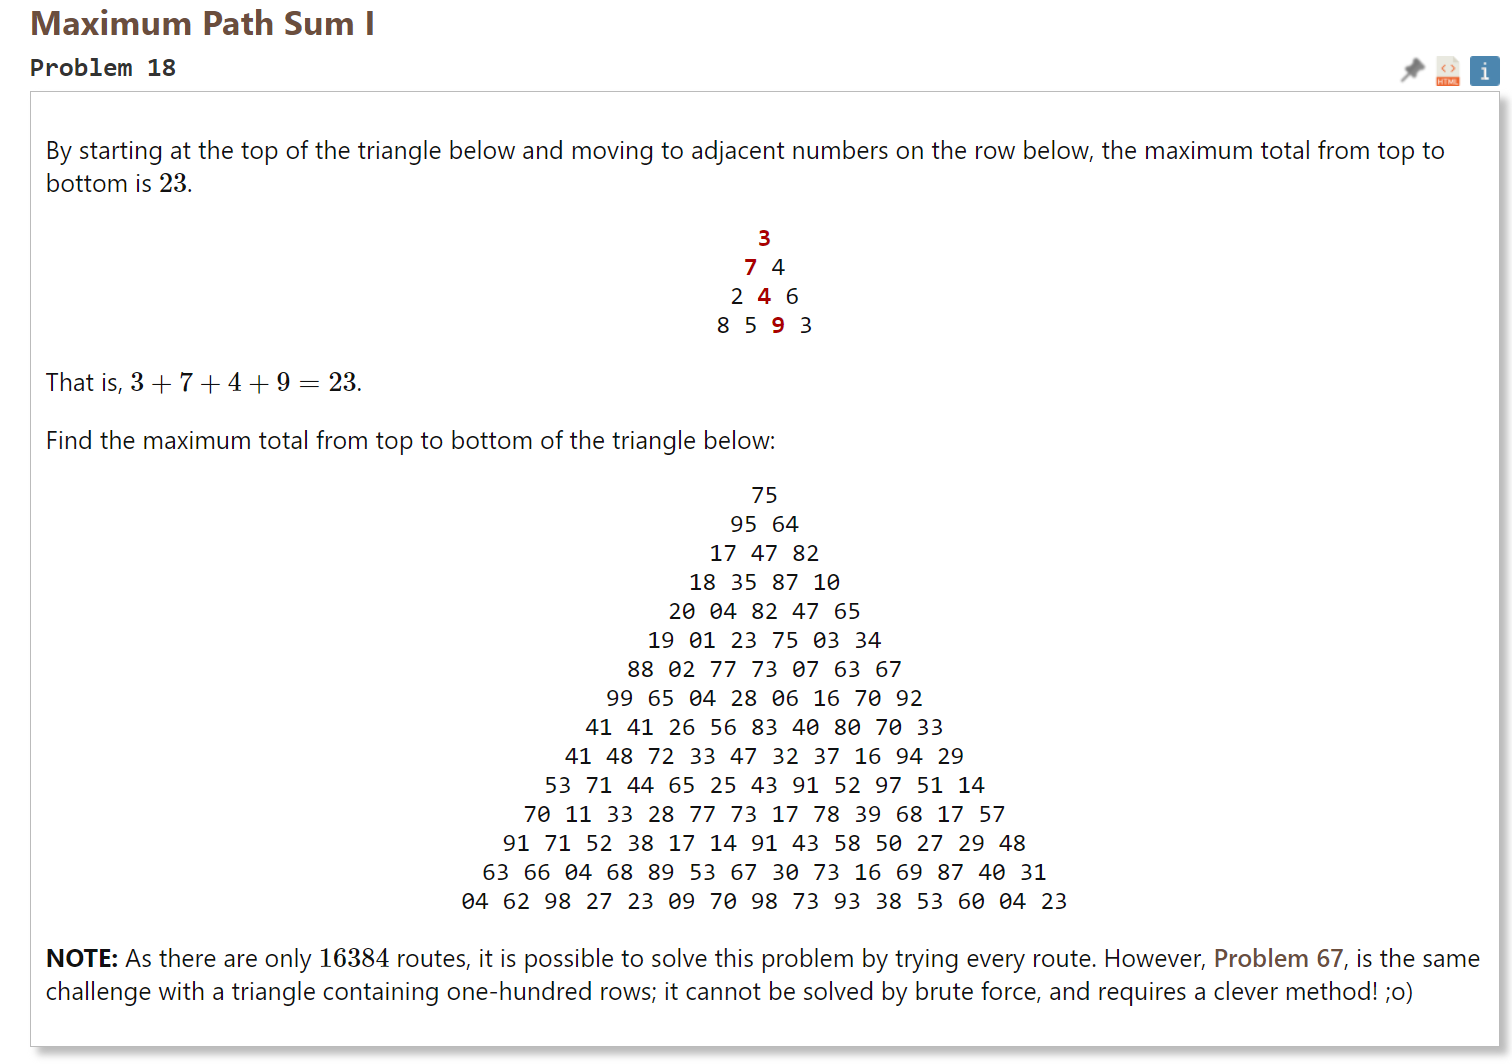

First thought is that every number can be replaced by the sum of (it) and (the max between the two numbers diagonally below)?  
If you think about it, the last layer can definitely be gotten rid of this way, as theres no need to consider any further, then the second last layer becomes the last layer and this can be done iteratively.  

In [67]:
import numpy as np
tri = """75
95 64
17 47 82
18 35 87 10
20 04 82 47 65
19 01 23 75 03 34
88 02 77 73 07 63 67
99 65 04 28 06 16 70 92
41 41 26 56 83 40 80 70 33
41 48 72 33 47 32 37 16 94 29
53 71 44 65 25 43 91 52 97 51 14
70 11 33 28 77 73 17 78 39 68 17 57
91 71 52 38 17 14 91 43 58 50 27 29 48
63 66 04 68 89 53 67 30 73 16 69 87 40 31
04 62 98 27 23 09 70 98 73 93 38 53 60 04 23"""

In [73]:
def find_max_path(triangle):
    tri = [np.array(row.split(' '), dtype =int) for row in triangle.split('\n')]
    for i in range(len(tri)-1):
        last_row = tri[-1]
        indexes = range(len(last_row)-1)
        tri[-2] = [max(last_row[i], last_row[i+1]) for i in indexes] + tri[-2]
        tri.pop()
    return int(tri[0])

In [74]:
find_max_path(tri)

C:\Users\Jacques Du Toit\AppData\Local\Temp\ipykernel_19860\1362299349.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(tri[0])


1074

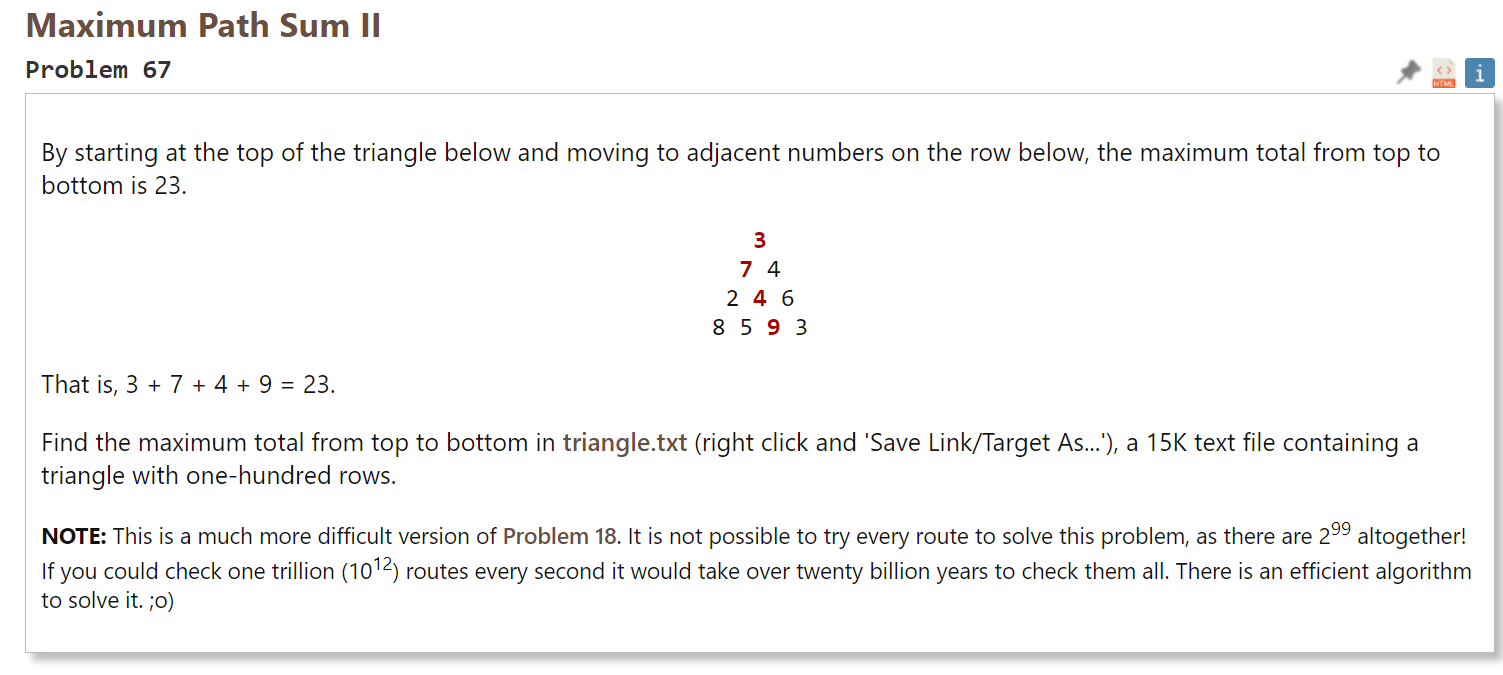

In [76]:
big = """59
73 41
52 40 09
26 53 06 34
10 51 87 86 81
61 95 66 57 25 68
90 81 80 38 92 67 73
30 28 51 76 81 18 75 44
84 14 95 87 62 81 17 78 58
21 46 71 58 02 79 62 39 31 09
56 34 35 53 78 31 81 18 90 93 15
78 53 04 21 84 93 32 13 97 11 37 51
45 03 81 79 05 18 78 86 13 30 63 99 95
39 87 96 28 03 38 42 17 82 87 58 07 22 57
06 17 51 17 07 93 09 07 75 97 95 78 87 08 53
67 66 59 60 88 99 94 65 55 77 55 34 27 53 78 28
76 40 41 04 87 16 09 42 75 69 23 97 30 60 10 79 87
12 10 44 26 21 36 32 84 98 60 13 12 36 16 63 31 91 35
70 39 06 05 55 27 38 48 28 22 34 35 62 62 15 14 94 89 86
66 56 68 84 96 21 34 34 34 81 62 40 65 54 62 05 98 03 02 60
38 89 46 37 99 54 34 53 36 14 70 26 02 90 45 13 31 61 83 73 47
36 10 63 96 60 49 41 05 37 42 14 58 84 93 96 17 09 43 05 43 06 59
66 57 87 57 61 28 37 51 84 73 79 15 39 95 88 87 43 39 11 86 77 74 18
54 42 05 79 30 49 99 73 46 37 50 02 45 09 54 52 27 95 27 65 19 45 26 45
71 39 17 78 76 29 52 90 18 99 78 19 35 62 71 19 23 65 93 85 49 33 75 09 02
33 24 47 61 60 55 32 88 57 55 91 54 46 57 07 77 98 52 80 99 24 25 46 78 79 05
92 09 13 55 10 67 26 78 76 82 63 49 51 31 24 68 05 57 07 54 69 21 67 43 17 63 12
24 59 06 08 98 74 66 26 61 60 13 03 09 09 24 30 71 08 88 70 72 70 29 90 11 82 41 34
66 82 67 04 36 60 92 77 91 85 62 49 59 61 30 90 29 94 26 41 89 04 53 22 83 41 09 74 90
48 28 26 37 28 52 77 26 51 32 18 98 79 36 62 13 17 08 19 54 89 29 73 68 42 14 08 16 70 37
37 60 69 70 72 71 09 59 13 60 38 13 57 36 09 30 43 89 30 39 15 02 44 73 05 73 26 63 56 86 12
55 55 85 50 62 99 84 77 28 85 03 21 27 22 19 26 82 69 54 04 13 07 85 14 01 15 70 59 89 95 10 19
04 09 31 92 91 38 92 86 98 75 21 05 64 42 62 84 36 20 73 42 21 23 22 51 51 79 25 45 85 53 03 43 22
75 63 02 49 14 12 89 14 60 78 92 16 44 82 38 30 72 11 46 52 90 27 08 65 78 03 85 41 57 79 39 52 33 48
78 27 56 56 39 13 19 43 86 72 58 95 39 07 04 34 21 98 39 15 39 84 89 69 84 46 37 57 59 35 59 50 26 15 93
42 89 36 27 78 91 24 11 17 41 05 94 07 69 51 96 03 96 47 90 90 45 91 20 50 56 10 32 36 49 04 53 85 92 25 65
52 09 61 30 61 97 66 21 96 92 98 90 06 34 96 60 32 69 68 33 75 84 18 31 71 50 84 63 03 03 19 11 28 42 75 45 45
61 31 61 68 96 34 49 39 05 71 76 59 62 67 06 47 96 99 34 21 32 47 52 07 71 60 42 72 94 56 82 83 84 40 94 87 82 46
01 20 60 14 17 38 26 78 66 81 45 95 18 51 98 81 48 16 53 88 37 52 69 95 72 93 22 34 98 20 54 27 73 61 56 63 60 34 63
93 42 94 83 47 61 27 51 79 79 45 01 44 73 31 70 83 42 88 25 53 51 30 15 65 94 80 44 61 84 12 77 02 62 02 65 94 42 14 94
32 73 09 67 68 29 74 98 10 19 85 48 38 31 85 67 53 93 93 77 47 67 39 72 94 53 18 43 77 40 78 32 29 59 24 06 02 83 50 60 66
32 01 44 30 16 51 15 81 98 15 10 62 86 79 50 62 45 60 70 38 31 85 65 61 64 06 69 84 14 22 56 43 09 48 66 69 83 91 60 40 36 61
92 48 22 99 15 95 64 43 01 16 94 02 99 19 17 69 11 58 97 56 89 31 77 45 67 96 12 73 08 20 36 47 81 44 50 64 68 85 40 81 85 52 09
91 35 92 45 32 84 62 15 19 64 21 66 06 01 52 80 62 59 12 25 88 28 91 50 40 16 22 99 92 79 87 51 21 77 74 77 07 42 38 42 74 83 02 05
46 19 77 66 24 18 05 32 02 84 31 99 92 58 96 72 91 36 62 99 55 29 53 42 12 37 26 58 89 50 66 19 82 75 12 48 24 87 91 85 02 07 03 76 86
99 98 84 93 07 17 33 61 92 20 66 60 24 66 40 30 67 05 37 29 24 96 03 27 70 62 13 04 45 47 59 88 43 20 66 15 46 92 30 04 71 66 78 70 53 99
67 60 38 06 88 04 17 72 10 99 71 07 42 25 54 05 26 64 91 50 45 71 06 30 67 48 69 82 08 56 80 67 18 46 66 63 01 20 08 80 47 07 91 16 03 79 87
18 54 78 49 80 48 77 40 68 23 60 88 58 80 33 57 11 69 55 53 64 02 94 49 60 92 16 35 81 21 82 96 25 24 96 18 02 05 49 03 50 77 06 32 84 27 18 38
68 01 50 04 03 21 42 94 53 24 89 05 92 26 52 36 68 11 85 01 04 42 02 45 15 06 50 04 53 73 25 74 81 88 98 21 67 84 79 97 99 20 95 04 40 46 02 58 87
94 10 02 78 88 52 21 03 88 60 06 53 49 71 20 91 12 65 07 49 21 22 11 41 58 99 36 16 09 48 17 24 52 36 23 15 72 16 84 56 02 99 43 76 81 71 29 39 49 17
64 39 59 84 86 16 17 66 03 09 43 06 64 18 63 29 68 06 23 07 87 14 26 35 17 12 98 41 53 64 78 18 98 27 28 84 80 67 75 62 10 11 76 90 54 10 05 54 41 39 66
43 83 18 37 32 31 52 29 95 47 08 76 35 11 04 53 35 43 34 10 52 57 12 36 20 39 40 55 78 44 07 31 38 26 08 15 56 88 86 01 52 62 10 24 32 05 60 65 53 28 57 99
03 50 03 52 07 73 49 92 66 80 01 46 08 67 25 36 73 93 07 42 25 53 13 96 76 83 87 90 54 89 78 22 78 91 73 51 69 09 79 94 83 53 09 40 69 62 10 79 49 47 03 81 30
71 54 73 33 51 76 59 54 79 37 56 45 84 17 62 21 98 69 41 95 65 24 39 37 62 03 24 48 54 64 46 82 71 78 33 67 09 16 96 68 52 74 79 68 32 21 13 78 96 60 09 69 20 36
73 26 21 44 46 38 17 83 65 98 07 23 52 46 61 97 33 13 60 31 70 15 36 77 31 58 56 93 75 68 21 36 69 53 90 75 25 82 39 50 65 94 29 30 11 33 11 13 96 02 56 47 07 49 02
76 46 73 30 10 20 60 70 14 56 34 26 37 39 48 24 55 76 84 91 39 86 95 61 50 14 53 93 64 67 37 31 10 84 42 70 48 20 10 72 60 61 84 79 69 65 99 73 89 25 85 48 92 56 97 16
03 14 80 27 22 30 44 27 67 75 79 32 51 54 81 29 65 14 19 04 13 82 04 91 43 40 12 52 29 99 07 76 60 25 01 07 61 71 37 92 40 47 99 66 57 01 43 44 22 40 53 53 09 69 26 81 07
49 80 56 90 93 87 47 13 75 28 87 23 72 79 32 18 27 20 28 10 37 59 21 18 70 04 79 96 03 31 45 71 81 06 14 18 17 05 31 50 92 79 23 47 09 39 47 91 43 54 69 47 42 95 62 46 32 85
37 18 62 85 87 28 64 05 77 51 47 26 30 65 05 70 65 75 59 80 42 52 25 20 44 10 92 17 71 95 52 14 77 13 24 55 11 65 26 91 01 30 63 15 49 48 41 17 67 47 03 68 20 90 98 32 04 40 68
90 51 58 60 06 55 23 68 05 19 76 94 82 36 96 43 38 90 87 28 33 83 05 17 70 83 96 93 06 04 78 47 80 06 23 84 75 23 87 72 99 14 50 98 92 38 90 64 61 58 76 94 36 66 87 80 51 35 61 38
57 95 64 06 53 36 82 51 40 33 47 14 07 98 78 65 39 58 53 06 50 53 04 69 40 68 36 69 75 78 75 60 03 32 39 24 74 47 26 90 13 40 44 71 90 76 51 24 36 50 25 45 70 80 61 80 61 43 90 64 11
18 29 86 56 68 42 79 10 42 44 30 12 96 18 23 18 52 59 02 99 67 46 60 86 43 38 55 17 44 93 42 21 55 14 47 34 55 16 49 24 23 29 96 51 55 10 46 53 27 92 27 46 63 57 30 65 43 27 21 20 24 83
81 72 93 19 69 52 48 01 13 83 92 69 20 48 69 59 20 62 05 42 28 89 90 99 32 72 84 17 08 87 36 03 60 31 36 36 81 26 97 36 48 54 56 56 27 16 91 08 23 11 87 99 33 47 02 14 44 73 70 99 43 35 33
90 56 61 86 56 12 70 59 63 32 01 15 81 47 71 76 95 32 65 80 54 70 34 51 40 45 33 04 64 55 78 68 88 47 31 47 68 87 03 84 23 44 89 72 35 08 31 76 63 26 90 85 96 67 65 91 19 14 17 86 04 71 32 95
37 13 04 22 64 37 37 28 56 62 86 33 07 37 10 44 52 82 52 06 19 52 57 75 90 26 91 24 06 21 14 67 76 30 46 14 35 89 89 41 03 64 56 97 87 63 22 34 03 79 17 45 11 53 25 56 96 61 23 18 63 31 37 37 47
77 23 26 70 72 76 77 04 28 64 71 69 14 85 96 54 95 48 06 62 99 83 86 77 97 75 71 66 30 19 57 90 33 01 60 61 14 12 90 99 32 77 56 41 18 14 87 49 10 14 90 64 18 50 21 74 14 16 88 05 45 73 82 47 74 44
22 97 41 13 34 31 54 61 56 94 03 24 59 27 98 77 04 09 37 40 12 26 87 09 71 70 07 18 64 57 80 21 12 71 83 94 60 39 73 79 73 19 97 32 64 29 41 07 48 84 85 67 12 74 95 20 24 52 41 67 56 61 29 93 35 72 69
72 23 63 66 01 11 07 30 52 56 95 16 65 26 83 90 50 74 60 18 16 48 43 77 37 11 99 98 30 94 91 26 62 73 45 12 87 73 47 27 01 88 66 99 21 41 95 80 02 53 23 32 61 48 32 43 43 83 14 66 95 91 19 81 80 67 25 88
08 62 32 18 92 14 83 71 37 96 11 83 39 99 05 16 23 27 10 67 02 25 44 11 55 31 46 64 41 56 44 74 26 81 51 31 45 85 87 09 81 95 22 28 76 69 46 48 64 87 67 76 27 89 31 11 74 16 62 03 60 94 42 47 09 34 94 93 72
56 18 90 18 42 17 42 32 14 86 06 53 33 95 99 35 29 15 44 20 49 59 25 54 34 59 84 21 23 54 35 90 78 16 93 13 37 88 54 19 86 67 68 55 66 84 65 42 98 37 87 56 33 28 58 38 28 38 66 27 52 21 81 15 08 22 97 32 85 27
91 53 40 28 13 34 91 25 01 63 50 37 22 49 71 58 32 28 30 18 68 94 23 83 63 62 94 76 80 41 90 22 82 52 29 12 18 56 10 08 35 14 37 57 23 65 67 40 72 39 93 39 70 89 40 34 07 46 94 22 20 05 53 64 56 30 05 56 61 88 27
23 95 11 12 37 69 68 24 66 10 87 70 43 50 75 07 62 41 83 58 95 93 89 79 45 39 02 22 05 22 95 43 62 11 68 29 17 40 26 44 25 71 87 16 70 85 19 25 59 94 90 41 41 80 61 70 55 60 84 33 95 76 42 63 15 09 03 40 38 12 03 32
09 84 56 80 61 55 85 97 16 94 82 94 98 57 84 30 84 48 93 90 71 05 95 90 73 17 30 98 40 64 65 89 07 79 09 19 56 36 42 30 23 69 73 72 07 05 27 61 24 31 43 48 71 84 21 28 26 65 65 59 65 74 77 20 10 81 61 84 95 08 52 23 70
47 81 28 09 98 51 67 64 35 51 59 36 92 82 77 65 80 24 72 53 22 07 27 10 21 28 30 22 48 82 80 48 56 20 14 43 18 25 50 95 90 31 77 08 09 48 44 80 90 22 93 45 82 17 13 96 25 26 08 73 34 99 06 49 24 06 83 51 40 14 15 10 25 01
54 25 10 81 30 64 24 74 75 80 36 75 82 60 22 69 72 91 45 67 03 62 79 54 89 74 44 83 64 96 66 73 44 30 74 50 37 05 09 97 70 01 60 46 37 91 39 75 75 18 58 52 72 78 51 81 86 52 08 97 01 46 43 66 98 62 81 18 70 93 73 08 32 46 34
96 80 82 07 59 71 92 53 19 20 88 66 03 26 26 10 24 27 50 82 94 73 63 08 51 33 22 45 19 13 58 33 90 15 22 50 36 13 55 06 35 47 82 52 33 61 36 27 28 46 98 14 73 20 73 32 16 26 80 53 47 66 76 38 94 45 02 01 22 52 47 96 64 58 52 39
88 46 23 39 74 63 81 64 20 90 33 33 76 55 58 26 10 46 42 26 74 74 12 83 32 43 09 02 73 55 86 54 85 34 28 23 29 79 91 62 47 41 82 87 99 22 48 90 20 05 96 75 95 04 43 28 81 39 81 01 28 42 78 25 39 77 90 57 58 98 17 36 73 22 63 74 51
29 39 74 94 95 78 64 24 38 86 63 87 93 06 70 92 22 16 80 64 29 52 20 27 23 50 14 13 87 15 72 96 81 22 08 49 72 30 70 24 79 31 16 64 59 21 89 34 96 91 48 76 43 53 88 01 57 80 23 81 90 79 58 01 80 87 17 99 86 90 72 63 32 69 14 28 88 69
37 17 71 95 56 93 71 35 43 45 04 98 92 94 84 96 11 30 31 27 31 60 92 03 48 05 98 91 86 94 35 90 90 08 48 19 33 28 68 37 59 26 65 96 50 68 22 07 09 49 34 31 77 49 43 06 75 17 81 87 61 79 52 26 27 72 29 50 07 98 86 01 17 10 46 64 24 18 56
51 30 25 94 88 85 79 91 40 33 63 84 49 67 98 92 15 26 75 19 82 05 18 78 65 93 61 48 91 43 59 41 70 51 22 15 92 81 67 91 46 98 11 11 65 31 66 10 98 65 83 21 05 56 05 98 73 67 46 74 69 34 08 30 05 52 07 98 32 95 30 94 65 50 24 63 28 81 99 57
19 23 61 36 09 89 71 98 65 17 30 29 89 26 79 74 94 11 44 48 97 54 81 55 39 66 69 45 28 47 13 86 15 76 74 70 84 32 36 33 79 20 78 14 41 47 89 28 81 05 99 66 81 86 38 26 06 25 13 60 54 55 23 53 27 05 89 25 23 11 13 54 59 54 56 34 16 24 53 44 06
13 40 57 72 21 15 60 08 04 19 11 98 34 45 09 97 86 71 03 15 56 19 15 44 97 31 90 04 87 87 76 08 12 30 24 62 84 28 12 85 82 53 99 52 13 94 06 65 97 86 09 50 94 68 69 74 30 67 87 94 63 07 78 27 80 36 69 41 06 92 32 78 37 82 30 05 18 87 99 72 19 99
44 20 55 77 69 91 27 31 28 81 80 27 02 07 97 23 95 98 12 25 75 29 47 71 07 47 78 39 41 59 27 76 13 15 66 61 68 35 69 86 16 53 67 63 99 85 41 56 08 28 33 40 94 76 90 85 31 70 24 65 84 65 99 82 19 25 54 37 21 46 33 02 52 99 51 33 26 04 87 02 08 18 96
54 42 61 45 91 06 64 79 80 82 32 16 83 63 42 49 19 78 65 97 40 42 14 61 49 34 04 18 25 98 59 30 82 72 26 88 54 36 21 75 03 88 99 53 46 51 55 78 22 94 34 40 68 87 84 25 30 76 25 08 92 84 42 61 40 38 09 99 40 23 29 39 46 55 10 90 35 84 56 70 63 23 91 39
52 92 03 71 89 07 09 37 68 66 58 20 44 92 51 56 13 71 79 99 26 37 02 06 16 67 36 52 58 16 79 73 56 60 59 27 44 77 94 82 20 50 98 33 09 87 94 37 40 83 64 83 58 85 17 76 53 02 83 52 22 27 39 20 48 92 45 21 09 42 24 23 12 37 52 28 50 78 79 20 86 62 73 20 59
54 96 80 15 91 90 99 70 10 09 58 90 93 50 81 99 54 38 36 10 30 11 35 84 16 45 82 18 11 97 36 43 96 79 97 65 40 48 23 19 17 31 64 52 65 65 37 32 65 76 99 79 34 65 79 27 55 33 03 01 33 27 61 28 66 08 04 70 49 46 48 83 01 45 19 96 13 81 14 21 31 79 93 85 50 05
92 92 48 84 59 98 31 53 23 27 15 22 79 95 24 76 05 79 16 93 97 89 38 89 42 83 02 88 94 95 82 21 01 97 48 39 31 78 09 65 50 56 97 61 01 07 65 27 21 23 14 15 80 97 44 78 49 35 33 45 81 74 34 05 31 57 09 38 94 07 69 54 69 32 65 68 46 68 78 90 24 28 49 51 45 86 35
41 63 89 76 87 31 86 09 46 14 87 82 22 29 47 16 13 10 70 72 82 95 48 64 58 43 13 75 42 69 21 12 67 13 64 85 58 23 98 09 37 76 05 22 31 12 66 50 29 99 86 72 45 25 10 28 19 06 90 43 29 31 67 79 46 25 74 14 97 35 76 37 65 46 23 82 06 22 30 76 93 66 94 17 96 13 20 72
63 40 78 08 52 09 90 41 70 28 36 14 46 44 85 96 24 52 58 15 87 37 05 98 99 39 13 61 76 38 44 99 83 74 90 22 53 80 56 98 30 51 63 39 44 30 91 91 04 22 27 73 17 35 53 18 35 45 54 56 27 78 48 13 69 36 44 38 71 25 30 56 15 22 73 43 32 69 59 25 93 83 45 11 34 94 44 39 92
12 36 56 88 13 96 16 12 55 54 11 47 19 78 17 17 68 81 77 51 42 55 99 85 66 27 81 79 93 42 65 61 69 74 14 01 18 56 12 01 58 37 91 22 42 66 83 25 19 04 96 41 25 45 18 69 96 88 36 93 10 12 98 32 44 83 83 04 72 91 04 27 73 07 34 37 71 60 59 31 01 54 54 44 96 93 83 36 04 45
30 18 22 20 42 96 65 79 17 41 55 69 94 81 29 80 91 31 85 25 47 26 43 49 02 99 34 67 99 76 16 14 15 93 08 32 99 44 61 77 67 50 43 55 87 55 53 72 17 46 62 25 50 99 73 05 93 48 17 31 70 80 59 09 44 59 45 13 74 66 58 94 87 73 16 14 85 38 74 99 64 23 79 28 71 42 20 37 82 31 23
51 96 39 65 46 71 56 13 29 68 53 86 45 33 51 49 12 91 21 21 76 85 02 17 98 15 46 12 60 21 88 30 92 83 44 59 42 50 27 88 46 86 94 73 45 54 23 24 14 10 94 21 20 34 23 51 04 83 99 75 90 63 60 16 22 33 83 70 11 32 10 50 29 30 83 46 11 05 31 17 86 42 49 01 44 63 28 60 07 78 95 40
44 61 89 59 04 49 51 27 69 71 46 76 44 04 09 34 56 39 15 06 94 91 75 90 65 27 56 23 74 06 23 33 36 69 14 39 05 34 35 57 33 22 76 46 56 10 61 65 98 09 16 69 04 62 65 18 99 76 49 18 72 66 73 83 82 40 76 31 89 91 27 88 17 35 41 35 32 51 32 67 52 68 74 85 80 57 07 11 62 66 47 22 67
65 37 19 97 26 17 16 24 24 17 50 37 64 82 24 36 32 11 68 34 69 31 32 89 79 93 96 68 49 90 14 23 04 04 67 99 81 74 70 74 36 96 68 09 64 39 88 35 54 89 96 58 66 27 88 97 32 14 06 35 78 20 71 06 85 66 57 02 58 91 72 05 29 56 73 48 86 52 09 93 22 57 79 42 12 01 31 68 17 59 63 76 07 77
73 81 14 13 17 20 11 09 01 83 08 85 91 70 84 63 62 77 37 07 47 01 59 95 39 69 39 21 99 09 87 02 97 16 92 36 74 71 90 66 33 73 73 75 52 91 11 12 26 53 05 26 26 48 61 50 90 65 01 87 42 47 74 35 22 73 24 26 56 70 52 05 48 41 31 18 83 27 21 39 80 85 26 08 44 02 71 07 63 22 05 52 19 08 20
17 25 21 11 72 93 33 49 64 23 53 82 03 13 91 65 85 02 40 05 42 31 77 42 05 36 06 54 04 58 07 76 87 83 25 57 66 12 74 33 85 37 74 32 20 69 03 97 91 68 82 44 19 14 89 28 85 85 80 53 34 87 58 98 88 78 48 65 98 40 11 57 10 67 70 81 60 79 74 72 97 59 79 47 30 20 54 80 89 91 14 05 33 36 79 39
60 85 59 39 60 07 57 76 77 92 06 35 15 72 23 41 45 52 95 18 64 79 86 53 56 31 69 11 91 31 84 50 44 82 22 81 41 40 30 42 30 91 48 94 74 76 64 58 74 25 96 57 14 19 03 99 28 83 15 75 99 01 89 85 79 50 03 95 32 67 44 08 07 41 62 64 29 20 14 76 26 55 48 71 69 66 19 72 44 25 14 01 48 74 12 98 07
64 66 84 24 18 16 27 48 20 14 47 69 30 86 48 40 23 16 61 21 51 50 26 47 35 33 91 28 78 64 43 68 04 79 51 08 19 60 52 95 06 68 46 86 35 97 27 58 04 65 30 58 99 12 12 75 91 39 50 31 42 64 70 04 46 07 98 73 98 93 37 89 77 91 64 71 64 65 66 21 78 62 81 74 42 20 83 70 73 95 78 45 92 27 34 53 71 15
30 11 85 31 34 71 13 48 05 14 44 03 19 67 23 73 19 57 06 90 94 72 57 69 81 62 59 68 88 57 55 69 49 13 07 87 97 80 89 05 71 05 05 26 38 40 16 62 45 99 18 38 98 24 21 26 62 74 69 04 85 57 77 35 58 67 91 79 79 57 86 28 66 34 72 51 76 78 36 95 63 90 08 78 47 63 45 31 22 70 52 48 79 94 15 77 61 67 68
23 33 44 81 80 92 93 75 94 88 23 61 39 76 22 03 28 94 32 06 49 65 41 34 18 23 08 47 62 60 03 63 33 13 80 52 31 54 73 43 70 26 16 69 57 87 83 31 03 93 70 81 47 95 77 44 29 68 39 51 56 59 63 07 25 70 07 77 43 53 64 03 94 42 95 39 18 01 66 21 16 97 20 50 90 16 70 10 95 69 29 06 25 61 41 26 15 59 63 35"""

In [81]:
find_max_path(big)

C:\Users\Jacques Du Toit\AppData\Local\Temp\ipykernel_19860\1362299349.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(tri[0])


7273

In [82]:
%%timeit
find_max_path(big)

C:\Users\Jacques Du Toit\AppData\Local\Temp\ipykernel_19860\1362299349.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(tri[0])


2.46 ms ± 42.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
